# Preprocessing

In [1]:
#Import dependencies.

import pandas as pd
import time
import numpy as np
import calendar
import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [74]:
t1 = time.time()
df = pd.read_csv('Motor_Vehicle_Collisions_Crashes.csv')
df['TIME'] = df['CRASH DATE'] + ' ' + df['CRASH TIME']
df['TIME'] = pd.to_datetime(df['TIME'], format="%m/%d/%Y %H:%M")
t2 = time.time()

#Discard observations where LOCATION is missing.
df = df.loc[~df['LOCATION'].isna()]
df = df.loc[~(df['LOCATION'] == '(0.0, 0.0)')]

df['ZIP CODE'] = df['ZIP CODE'].replace({'     ' : np.nan}).astype(float)
#df['ZIP CODE'] = df['ZIP CODE'].astype(float).fillna(0).astype(int)

#Discard 2012 and 2021. 
df = df.loc[(df['TIME'].dt.year > 2012) & (df['TIME'].dt.year < 2021)]
print(f'Time elapsed: {t2-t1} seconds.')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



Time elapsed: 12.656378030776978 seconds.


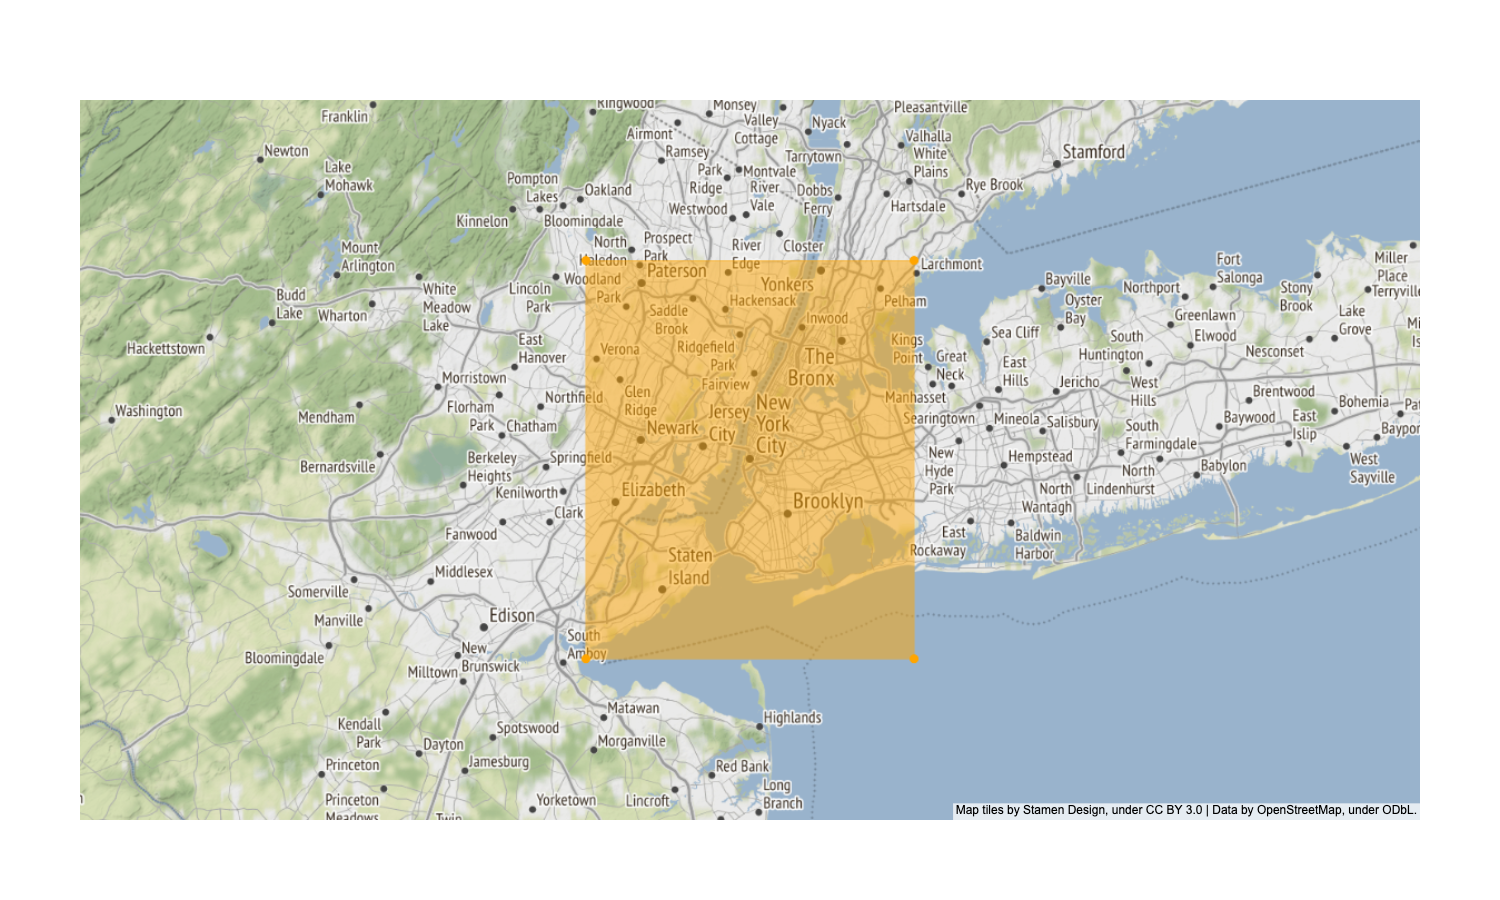

In [3]:
import plotly.graph_objects as go
lon_center = -74.006058
lat_center = 40.712772
lat_width = 0.23
lon_width  = 0.25

fig = go.Figure(go.Scattermapbox(
    fill = "toself",
    lon = [lon_center-lon_width, lon_center+lon_width, lon_center+lon_width, lon_center-lon_width], lat = [lat_center+lat_width, lat_center+lat_width, lat_center-lat_width, lat_center-lat_width],
    marker = { 'size': 10, 'color': "orange" }))

fig.update_layout(
    mapbox = {
        'style': "stamen-terrain",
        'center': {'lon': -74.006058, 'lat': 40.712772},
        'zoom': 8.85},
    showlegend = False, width=1200, height=900)

fig.show()

df = df.loc[(df['LONGITUDE'] >= lon_center - lon_width) & 
            (df['LONGITUDE'] <= lon_center + lon_width) & 
            (df['LATITUDE']  >= lat_center - lat_width) & 
            (df['LATITUDE'] <= lat_center + lat_width)]

## Adding new columns

We wish to add a column specifying whether or not any was injured or killed.



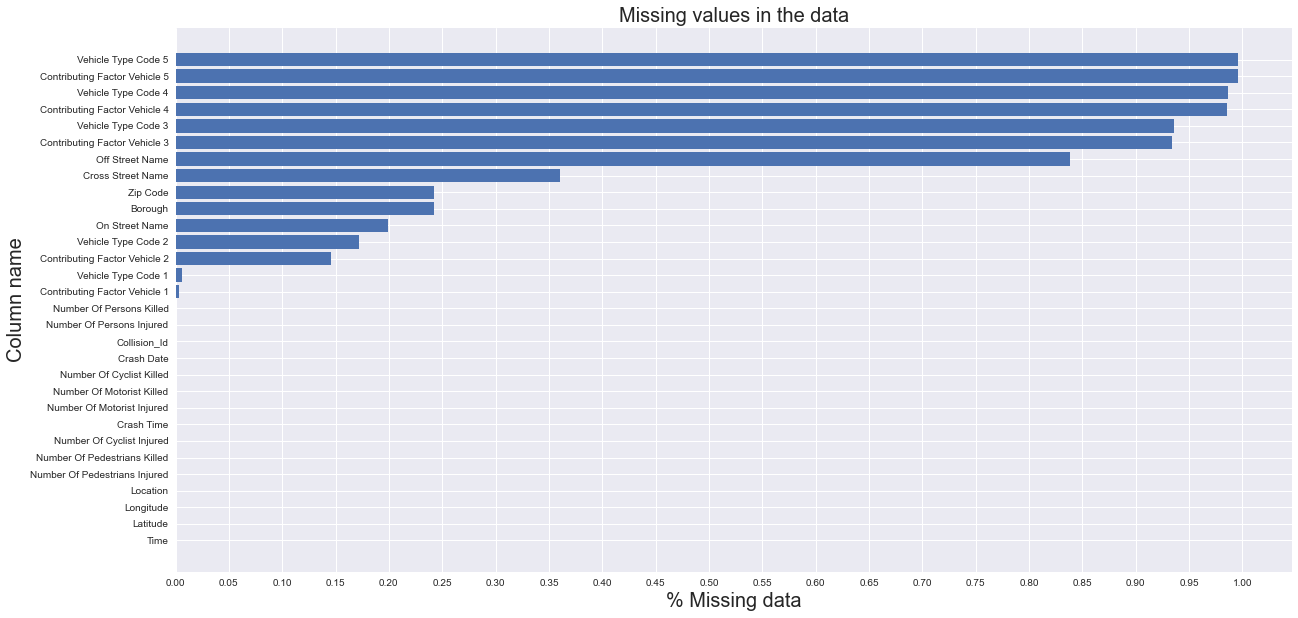

In [75]:
plt.figure(figsize=(20,10))
plt.title('Missing values in the data', fontsize=20)
missing_pct_df = pd.DataFrame((df.isnull().sum(axis=0)/len(df)).sort_values(ascending=False)).reset_index(); missing_pct_df.columns = ['Column', 'MissingPct']
plt.barh([x.title() for x in missing_pct_df['Column']], missing_pct_df['MissingPct'])
plt.gca().invert_yaxis()
plt.xlabel('% Missing data', fontsize=20)
plt.ylabel('Column name', fontsize=20)
plt.xticks(np.arange(0, 1.05, 0.05))
plt.show()

## Filling in Missing Borough and ZIP Codes

In [171]:
(_, data_complete), (_, data_missing) = df.groupby(np.any(pd.isna(df[['ZIP CODE', 'BOROUGH']]), axis=1))

In [172]:
print(f'Number of rows with either BOROUGH or ZIP CODE missing: {len(data_missing)}\n')
data_missing.head()

Number of rows with either BOROUGH or ZIP CODE missing: 351091



CRASH DATE CRASH TIME BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
217  12/18/2020      21:55     NaN       NaN  40.695970 -73.913370   
232  12/11/2020      14:43     NaN       NaN  40.843246 -73.945050   
237  12/08/2020       2:00     NaN       NaN  40.865100 -73.921890   
238  12/07/2020      10:00     NaN       NaN  40.820827 -73.950836   
243  12/05/2020      13:45     NaN       NaN  40.651863 -73.865360   

                    LOCATION                    ON STREET NAME  \
217    (40.69597, -73.91337)  KNICKERBOCKER AVENUE               
232   (40.843246, -73.94505)  HENRY HUDSON PARKWAY               
237     (40.8651, -73.92189)  SHERMAN AVENUE                     
238  (40.820827, -73.950836)  WEST 138 STREET                    
243   (40.651863, -73.86536)  BELT PARKWAY                       

    CROSS STREET NAME OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 3  \
217               NaN             NaN  ...                            NaN   
232               NaN             NaN  ...                            NaN   
237               NaN             NaN  ...                            NaN   
238               NaN             NaN  ...                            NaN   
243               NaN             NaN  ...                    Unspecified   

     CONTRIBUTING FACTOR VEHICLE 4  CONTRIBUTING FACTOR VEHICLE 5  \
217                            NaN                            NaN   
232                            NaN                            NaN   
237                            NaN                            NaN   
238                            NaN                            NaN   
243                            NaN                            NaN   

     COLLISION_ID  VEHICLE TYPE CODE 1                  VEHICLE TYPE CODE 2  \
217       4377213                Sedan                                  NaN   
232       4375744                Sedan                                  NaN   
237       4374133                Sedan                                Sedan   
238       4374340                Sedan                                  NaN   
243       4373337                Sedan  Station Wagon/Sport Utility Vehicle   

     VEHICLE TYPE CODE 3  VEHICLE TYPE CODE 4 VEHICLE TYPE CODE 5  \
217                  NaN                  NaN                 NaN   
232                  NaN                  NaN                 NaN   
237                  NaN                  NaN                 NaN   
238                  NaN                  NaN                 NaN   
243                Sedan                  NaN                 NaN   

                   TIME  
217 2020-12-18 21:55:00  
232 2020-12-11 14:43:00  
237 2020-12-08 02:00:00  
238 2020-12-07 10:00:00  
243 2020-12-05 13:45:00  

[5 rows x 30 columns]

In [173]:
print(f'Number of rows with both BOROUGH and ZIP CODE: {len(data_complete)}\n')
data_complete.head()

Number of rows with both BOROUGH and ZIP CODE: 1099463



CRASH DATE CRASH TIME    BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
199  12/28/2020      17:28      BRONX   10456.0  40.824066 -73.908714   
218  12/17/2020      14:43     QUEENS   11368.0  40.747650 -73.863010   
221  12/15/2020      11:00  MANHATTAN   10002.0  40.713920 -73.991714   
224  12/14/2020      17:11      BRONX   10459.0  40.820990 -73.895890   
236  12/08/2020      19:52   BROOKLYN   11229.0  40.599728 -73.937920   

                    LOCATION                    ON STREET NAME  \
199  (40.824066, -73.908714)  3 AVENUE                           
218    (40.74765, -73.86301)                               NaN   
221   (40.71392, -73.991714)                               NaN   
224    (40.82099, -73.89589)  KELLY STREET                       
236   (40.599728, -73.93792)                               NaN   

    CROSS STREET NAME                           OFF STREET NAME  ...  \
199   EAST 163 STREET                                       NaN  ...   
218               NaN  102-02    42 AVENUE                       ...   
221               NaN  129       EAST BROADWAY                   ...   
224   EAST 163 STREET                                       NaN  ...   
236               NaN  2152      FORD STREET                     ...   

     CONTRIBUTING FACTOR VEHICLE 3  CONTRIBUTING FACTOR VEHICLE 4  \
199                            NaN                            NaN   
218                            NaN                            NaN   
221                            NaN                            NaN   
224                            NaN                            NaN   
236                            NaN                            NaN   

     CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID     VEHICLE TYPE CODE 1  \
199                            NaN       4379833                   Sedan   
218                            NaN       4376945  Tractor Truck Gasoline   
221                            NaN       4376264                   Sedan   
224                            NaN       4376147                   Sedan   
236                            NaN       4374372                   Sedan   

     VEHICLE TYPE CODE 2  VEHICLE TYPE CODE 3  VEHICLE TYPE CODE 4  \
199                Sedan                  NaN                  NaN   
218                  NaN                  NaN                  NaN   
221                  NaN                  NaN                  NaN   
224                  NaN                  NaN                  NaN   
236                  NaN                  NaN                  NaN   

    VEHICLE TYPE CODE 5                TIME  
199                 NaN 2020-12-28 17:28:00  
218                 NaN 2020-12-17 14:43:00  
221                 NaN 2020-12-15 11:00:00  
224                 NaN 2020-12-14 17:11:00  
236                 NaN 2020-12-08 19:52:00  

[5 rows x 30 columns]

Even with the complete data, the police seems to have some issues regarding which zip codes belong where.

In [174]:
counts = data_complete.groupby(['ZIP CODE', 'BOROUGH']).size().reset_index(); counts.columns = ['ZIP CODE', 'BOROUGH', 'COUNT']
zips, n = np.unique(counts['ZIP CODE'], return_counts=True)
counts.loc[counts['ZIP CODE'].apply(lambda x : x in zips[n > 1])]

ZIP CODE   BOROUGH  COUNT
142   11208.0  BROOKLYN  12337
143   11208.0    QUEENS    156
171   11237.0  BROOKLYN   6367
172   11237.0    QUEENS    280
203   11385.0  BROOKLYN     30
204   11385.0    QUEENS  13513
215   11421.0  BROOKLYN      6
216   11421.0    QUEENS   4208

We can see out of the 12493 observations with ZIP CODE 11208, 156 of them were in Queens and 12337 of them were in Brooklyn. 
With these cases, we are going to let the majority of the observations decide which borough is the correct one. From the table above, we can see that we have a total of **472** observations with the wrong borough.

In [175]:
#We make a mapping between zip code and the correct borough.
zip_to_borough = {}
for zip_, subset in counts.groupby('ZIP CODE'):
    zip_to_borough[zip_] = subset.sort_values('COUNT', ascending=False)['BOROUGH'].iloc[0]
    
correct_boroughs = data_missing['ZIP CODE'].replace(zip_to_borough)
n_remaps = (correct_boroughs != data_complete['BOROUGH']).sum()
print(f'We have remapped {n_remaps} observations.')

data_complete['BOROUGH'] = correct_boroughs

We have remapped 472 observations.


In [178]:
data_complete.head()

CRASH DATE CRASH TIME    BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
199  12/28/2020      17:28      BRONX   10456.0  40.824066 -73.908714   
218  12/17/2020      14:43     QUEENS   11368.0  40.747650 -73.863010   
221  12/15/2020      11:00  MANHATTAN   10002.0  40.713920 -73.991714   
224  12/14/2020      17:11      BRONX   10459.0  40.820990 -73.895890   
236  12/08/2020      19:52   BROOKLYN   11229.0  40.599728 -73.937920   

                    LOCATION                    ON STREET NAME  \
199  (40.824066, -73.908714)  3 AVENUE                           
218    (40.74765, -73.86301)                               NaN   
221   (40.71392, -73.991714)                               NaN   
224    (40.82099, -73.89589)  KELLY STREET                       
236   (40.599728, -73.93792)                               NaN   

    CROSS STREET NAME                           OFF STREET NAME  ...  \
199   EAST 163 STREET                                       NaN  ...   
218               NaN  102-02    42 AVENUE                       ...   
221               NaN  129       EAST BROADWAY                   ...   
224   EAST 163 STREET                                       NaN  ...   
236               NaN  2152      FORD STREET                     ...   

     CONTRIBUTING FACTOR VEHICLE 3  CONTRIBUTING FACTOR VEHICLE 4  \
199                            NaN                            NaN   
218                            NaN                            NaN   
221                            NaN                            NaN   
224                            NaN                            NaN   
236                            NaN                            NaN   

     CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID     VEHICLE TYPE CODE 1  \
199                            NaN       4379833                   Sedan   
218                            NaN       4376945  Tractor Truck Gasoline   
221                            NaN       4376264                   Sedan   
224                            NaN       4376147                   Sedan   
236                            NaN       4374372                   Sedan   

     VEHICLE TYPE CODE 2  VEHICLE TYPE CODE 3  VEHICLE TYPE CODE 4  \
199                Sedan                  NaN                  NaN   
218                  NaN                  NaN                  NaN   
221                  NaN                  NaN                  NaN   
224                  NaN                  NaN                  NaN   
236                  NaN                  NaN                  NaN   

    VEHICLE TYPE CODE 5                TIME  
199                 NaN 2020-12-28 17:28:00  
218                 NaN 2020-12-17 14:43:00  
221                 NaN 2020-12-15 11:00:00  
224                 NaN 2020-12-14 17:11:00  
236                 NaN 2020-12-08 19:52:00  

[5 rows x 30 columns]

In [182]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

Xtrain = data_complete[['LATITUDE', 'LONGITUDE']].values
ytrain = le.fit_transform(data_complete['ZIP CODE'].to_numpy())

clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(Xtrain,ytrain)

Ximpute = data_missing[['LATITUDE', 'LONGITUDE']].values
yimpute = le.inverse_transform(clf.predict(Ximpute))

In [186]:
data_missing.head()

CRASH DATE CRASH TIME BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
217  12/18/2020      21:55     NaN       NaN  40.695970 -73.913370   
232  12/11/2020      14:43     NaN       NaN  40.843246 -73.945050   
237  12/08/2020       2:00     NaN       NaN  40.865100 -73.921890   
238  12/07/2020      10:00     NaN       NaN  40.820827 -73.950836   
243  12/05/2020      13:45     NaN       NaN  40.651863 -73.865360   

                    LOCATION                    ON STREET NAME  \
217    (40.69597, -73.91337)  KNICKERBOCKER AVENUE               
232   (40.843246, -73.94505)  HENRY HUDSON PARKWAY               
237     (40.8651, -73.92189)  SHERMAN AVENUE                     
238  (40.820827, -73.950836)  WEST 138 STREET                    
243   (40.651863, -73.86536)  BELT PARKWAY                       

    CROSS STREET NAME OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 3  \
217               NaN             NaN  ...                            NaN   
232               NaN             NaN  ...                            NaN   
237               NaN             NaN  ...                            NaN   
238               NaN             NaN  ...                            NaN   
243               NaN             NaN  ...                    Unspecified   

     CONTRIBUTING FACTOR VEHICLE 4  CONTRIBUTING FACTOR VEHICLE 5  \
217                            NaN                            NaN   
232                            NaN                            NaN   
237                            NaN                            NaN   
238                            NaN                            NaN   
243                            NaN                            NaN   

     COLLISION_ID  VEHICLE TYPE CODE 1                  VEHICLE TYPE CODE 2  \
217       4377213                Sedan                                  NaN   
232       4375744                Sedan                                  NaN   
237       4374133                Sedan                                Sedan   
238       4374340                Sedan                                  NaN   
243       4373337                Sedan  Station Wagon/Sport Utility Vehicle   

     VEHICLE TYPE CODE 3  VEHICLE TYPE CODE 4 VEHICLE TYPE CODE 5  \
217                  NaN                  NaN                 NaN   
232                  NaN                  NaN                 NaN   
237                  NaN                  NaN                 NaN   
238                  NaN                  NaN                 NaN   
243                Sedan                  NaN                 NaN   

                   TIME  
217 2020-12-18 21:55:00  
232 2020-12-11 14:43:00  
237 2020-12-08 02:00:00  
238 2020-12-07 10:00:00  
243 2020-12-05 13:45:00  

[5 rows x 30 columns]

In [187]:
data_missing['ZIP CODE'] = yimpute
data_missing['BOROUGH']  = data_missing['ZIP CODE'].replace(zip_to_borough)

In [192]:
data_missing.head()

CRASH DATE CRASH TIME    BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
217  12/18/2020      21:55   BROOKLYN   11221.0  40.695970 -73.913370   
232  12/11/2020      14:43  MANHATTAN   10032.0  40.843246 -73.945050   
237  12/08/2020       2:00  MANHATTAN   10034.0  40.865100 -73.921890   
238  12/07/2020      10:00  MANHATTAN   10031.0  40.820827 -73.950836   
243  12/05/2020      13:45   BROOKLYN   11234.0  40.651863 -73.865360   

                    LOCATION                    ON STREET NAME  \
217    (40.69597, -73.91337)  KNICKERBOCKER AVENUE               
232   (40.843246, -73.94505)  HENRY HUDSON PARKWAY               
237     (40.8651, -73.92189)  SHERMAN AVENUE                     
238  (40.820827, -73.950836)  WEST 138 STREET                    
243   (40.651863, -73.86536)  BELT PARKWAY                       

    CROSS STREET NAME OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 3  \
217               NaN             NaN  ...                            NaN   
232               NaN             NaN  ...                            NaN   
237               NaN             NaN  ...                            NaN   
238               NaN             NaN  ...                            NaN   
243               NaN             NaN  ...                    Unspecified   

     CONTRIBUTING FACTOR VEHICLE 4  CONTRIBUTING FACTOR VEHICLE 5  \
217                            NaN                            NaN   
232                            NaN                            NaN   
237                            NaN                            NaN   
238                            NaN                            NaN   
243                            NaN                            NaN   

     COLLISION_ID  VEHICLE TYPE CODE 1                  VEHICLE TYPE CODE 2  \
217       4377213                Sedan                                  NaN   
232       4375744                Sedan                                  NaN   
237       4374133                Sedan                                Sedan   
238       4374340                Sedan                                  NaN   
243       4373337                Sedan  Station Wagon/Sport Utility Vehicle   

     VEHICLE TYPE CODE 3  VEHICLE TYPE CODE 4 VEHICLE TYPE CODE 5  \
217                  NaN                  NaN                 NaN   
232                  NaN                  NaN                 NaN   
237                  NaN                  NaN                 NaN   
238                  NaN                  NaN                 NaN   
243                Sedan                  NaN                 NaN   

                   TIME  
217 2020-12-18 21:55:00  
232 2020-12-11 14:43:00  
237 2020-12-08 02:00:00  
238 2020-12-07 10:00:00  
243 2020-12-05 13:45:00  

[5 rows x 30 columns]

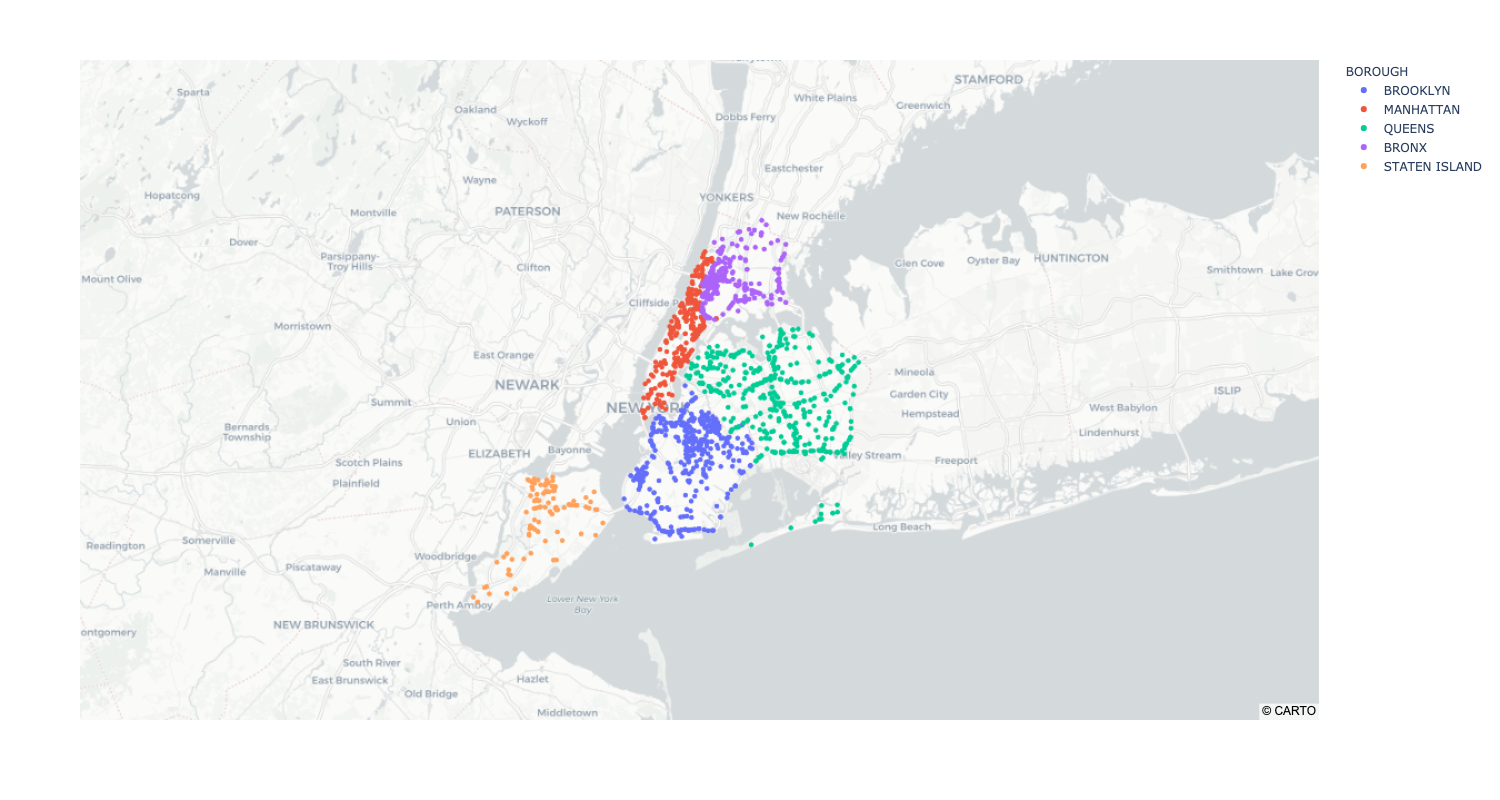

In [204]:
import plotly.express as px
fig = px.scatter_mapbox(data_missing[:1500], lat='LATITUDE', lon='LONGITUDE', color='BOROUGH',
                        center=dict(lat=40.730610, lon=-73.935242), zoom=9,
                        mapbox_style="carto-positron",
                       width = 800, height = 800)
fig.show()

In [211]:
df = data_complete.append(data_missing)

If contributing factor vehicle 1 is nan, then fill it with unspecified.

In [235]:
df['CONTRIBUTING FACTOR VEHICLE 1'] = df['CONTRIBUTING FACTOR VEHICLE 1'].fillna('Unspecified')

# Preprocess Contributing Factors


In [237]:
unique_factors = np.unique(df[[f'CONTRIBUTING FACTOR VEHICLE {i}' for i in range(1,6)]].values.reshape(-1,).astype(str))

In [252]:
for i, factor in enumerate(unique_factors):
    df[f'CF_{factor}'] = df[[f'CONTRIBUTING FACTOR VEHICLE {i}' for i in range(1,6)]].astype(str).apply(lambda x : factor in list(x), axis=1).astype(int)
    print(f'#{i+1}/{len(unique_factors)}: {factor} done')

#1/62: 1 done
#2/62: 80 done
#3/62: Accelerator Defective done
#4/62: Aggressive Driving/Road Rage done
#5/62: Alcohol Involvement done
#6/62: Animals Action done
#7/62: Backing Unsafely done
#8/62: Brakes Defective done
#9/62: Cell Phone (hand-Held) done
#10/62: Cell Phone (hand-held) done
#11/62: Cell Phone (hands-free) done
#12/62: Driver Inattention/Distraction done
#13/62: Driver Inexperience done
#14/62: Driverless/Runaway Vehicle done
#15/62: Drugs (Illegal) done
#16/62: Drugs (illegal) done
#17/62: Eating or Drinking done
#18/62: Failure to Keep Right done
#19/62: Failure to Yield Right-of-Way done
#20/62: Fatigued/Drowsy done
#21/62: Fell Asleep done
#22/62: Following Too Closely done
#23/62: Glare done
#24/62: Headlights Defective done
#25/62: Illnes done
#26/62: Illness done
#27/62: Lane Marking Improper/Inadequate done
#28/62: Listening/Using Headphones done
#29/62: Lost Consciousness done
#30/62: Obstruction/Debris done
#31/62: Other Electronic Device done
#32/62: Other Li

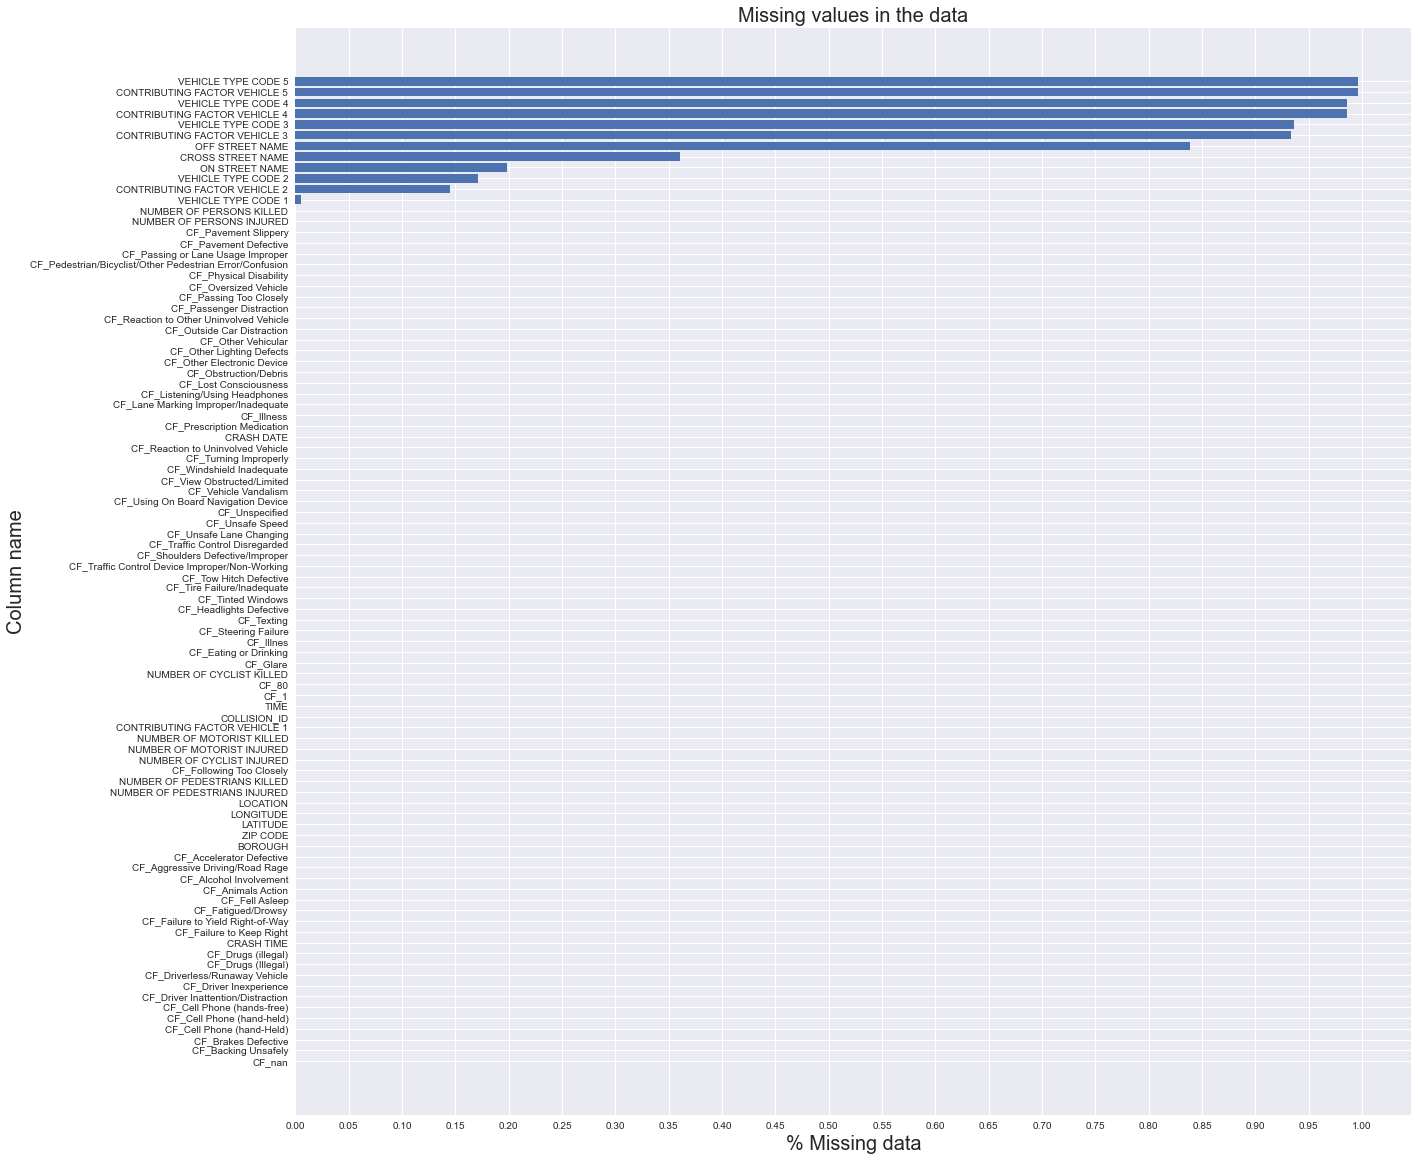

In [263]:
plt.figure(figsize=(20,20))
plt.title('Missing values in the data', fontsize=20)
missing_pct_df = pd.DataFrame((df.isnull().sum(axis=0)/len(df)).sort_values(ascending=False)).reset_index(); missing_pct_df.columns = ['Column', 'MissingPct']
plt.barh([x for x in missing_pct_df['Column']], missing_pct_df['MissingPct'])
plt.gca().invert_yaxis()
plt.xlabel('% Missing data', fontsize=20)
plt.ylabel('Column name', fontsize=20)
plt.xticks(np.arange(0, 1.05, 0.05))
plt.show()

In [265]:
df.to_csv('preprocessed_collisions.csv', index=False)

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'TIME', 'CF_1', 'CF_80', 'CF_Accelerator Defective',
       'CF_Aggressive Driving/Road Rage', 'CF_Alcohol Involvement',
       'CF_Animals Action', 'CF_Backing Unsafely', 'CF_Brakes Defective',
       'CF_Cell Phone (hand-Held)', 'CF_C